In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [6]:
dataset = pd.read_csv('practice_data.csv')
dataset.head(10)

,Name,Age,Gender,City,Salary,Department
0,Alice,29.0,Female,New York,70000.0,HR
1,Bob,NaN,Male,Los Angeles,80000.0,Finance
2,Charlie,25.0,NaN,Chicago,NaN,IT
3,David,40.0,Male,NaN,95000.0,IT
4,Eva,30.0,Female,Phoenix,85000.0,HR
5,Frank,28.0,Male,Dallas,NaN,Finance
6,Grace,NaN,Female,NaN,72000.0,HR
7,Henry,35.0,Male,Houston,78000.0,NaN
8,Ivy,NaN,Female,Seattle,NaN,Finance
9,Jack,32.0,NaN,Boston,88000.0,IT


In [7]:
dataset.isnull()

,Name,Age,Gender,City,Salary,Department
0,False,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,True,False,True,False
3,False,False,False,True,False,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False
6,False,True,False,True,False,False
7,False,False,False,False,False,True
8,False,True,False,False,True,False
9,False,False,True,False,False,False


In [8]:
dataset.isnull().sum()

Name          0
Age           3
Gender        2
City          2
Salary        3
Department    1
dtype: int64

In [9]:
dataset.isnull().sum().sum()

np.int64(11)

NameError: name 'plt' is not defined

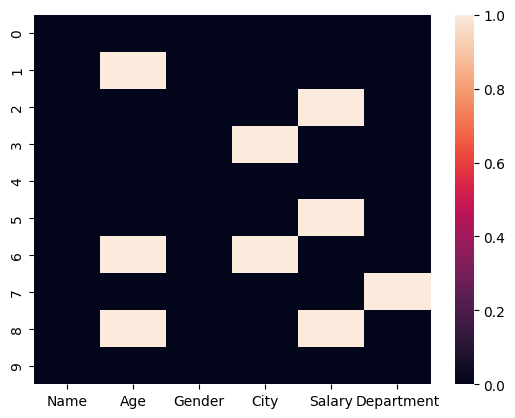

In [31]:
sns.heatmap(dataset.isnull())
plt.show()


In [18]:
(dataset.isnull().sum().sum()/(dataset.shape[0] * dataset.shape[1]))*100

np.float64(18.333333333333332)

In [19]:
dataset.drop(columns = ['Age'])

,Name,Gender,City,Salary,Department
0,Alice,Female,New York,70000.0,HR
1,Bob,Male,Los Angeles,80000.0,Finance
2,Charlie,NaN,Chicago,NaN,IT
3,David,Male,NaN,95000.0,IT
4,Eva,Female,Phoenix,85000.0,HR
5,Frank,Male,Dallas,NaN,Finance
6,Grace,Female,NaN,72000.0,HR
7,Henry,Male,Houston,78000.0,NaN
8,Ivy,Female,Seattle,NaN,Finance
9,Jack,NaN,Boston,88000.0,IT


In [20]:
dataset.fillna(10)

,Name,Age,Gender,City,Salary,Department
0,Alice,29.0,Female,New York,70000.0,HR
1,Bob,10.0,Male,Los Angeles,80000.0,Finance
2,Charlie,25.0,10,Chicago,10.0,IT
3,David,40.0,Male,10,95000.0,IT
4,Eva,30.0,Female,Phoenix,85000.0,HR
5,Frank,28.0,Male,Dallas,10.0,Finance
6,Grace,10.0,Female,10,72000.0,HR
7,Henry,35.0,Male,Houston,78000.0,10
8,Ivy,10.0,Female,Seattle,10.0,Finance
9,Jack,32.0,10,Boston,88000.0,IT


In [21]:
dataset.ffill()

,Name,Age,Gender,City,Salary,Department
0,Alice,29.0,Female,New York,70000.0,HR
1,Bob,29.0,Male,Los Angeles,80000.0,Finance
2,Charlie,25.0,Male,Chicago,80000.0,IT
3,David,40.0,Male,Chicago,95000.0,IT
4,Eva,30.0,Female,Phoenix,85000.0,HR
5,Frank,28.0,Male,Dallas,85000.0,Finance
6,Grace,28.0,Female,Dallas,72000.0,HR
7,Henry,35.0,Male,Houston,78000.0,HR
8,Ivy,35.0,Female,Seattle,78000.0,Finance
9,Jack,32.0,Female,Boston,88000.0,IT


In [22]:
dataset.bfill()

,Name,Age,Gender,City,Salary,Department
0,Alice,29.0,Female,New York,70000.0,HR
1,Bob,25.0,Male,Los Angeles,80000.0,Finance
2,Charlie,25.0,Male,Chicago,95000.0,IT
3,David,40.0,Male,Phoenix,95000.0,IT
4,Eva,30.0,Female,Phoenix,85000.0,HR
5,Frank,28.0,Male,Dallas,72000.0,Finance
6,Grace,35.0,Female,Houston,72000.0,HR
7,Henry,35.0,Male,Houston,78000.0,Finance
8,Ivy,32.0,Female,Seattle,88000.0,Finance
9,Jack,32.0,NaN,Boston,88000.0,IT


In [23]:
dataset['City'].fillna(dataset['City'].mode()[0])

0       New York
1    Los Angeles
2        Chicago
3         Boston
4        Phoenix
5         Dallas
6         Boston
7        Houston
8        Seattle
9         Boston
Name: City, dtype: object

In [24]:
dataset.select_dtypes(include = 'float64')

,Age,Salary
0,29.0,70000.0
1,NaN,80000.0
2,25.0,NaN
3,40.0,95000.0
4,30.0,85000.0
5,28.0,NaN
6,NaN,72000.0
7,35.0,78000.0
8,NaN,NaN
9,32.0,88000.0


In [25]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
ar = si.fit_transform(dataset[['Age' , 'Salary']])
new_dataset = pd.DataFrame(ar , columns=dataset.select_dtypes(include='float64').columns)
new_dataset

,Age,Salary
0,29.000000,70000.000000
1,31.285714,80000.000000
2,25.000000,81142.857143
3,40.000000,95000.000000
4,30.000000,85000.000000
5,28.000000,81142.857143
6,31.285714,72000.000000
7,35.000000,78000.000000
8,31.285714,81142.857143
9,32.000000,88000.000000


In [26]:
dataset

,Name,Age,Gender,City,Salary,Department
0,Alice,29.0,Female,New York,70000.0,HR
1,Bob,NaN,Male,Los Angeles,80000.0,Finance
2,Charlie,25.0,NaN,Chicago,NaN,IT
3,David,40.0,Male,NaN,95000.0,IT
4,Eva,30.0,Female,Phoenix,85000.0,HR
5,Frank,28.0,Male,Dallas,NaN,Finance
6,Grace,NaN,Female,NaN,72000.0,HR
7,Henry,35.0,Male,Houston,78000.0,NaN
8,Ivy,NaN,Female,Seattle,NaN,Finance
9,Jack,32.0,NaN,Boston,88000.0,IT


In [27]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0] , inplace=True)

In [28]:
dataset

,Name,Age,Gender,City,Salary,Department
0,Alice,29.0,Female,New York,70000.0,HR
1,Bob,NaN,Male,Los Angeles,80000.0,Finance
2,Charlie,25.0,Female,Chicago,NaN,IT
3,David,40.0,Male,NaN,95000.0,IT
4,Eva,30.0,Female,Phoenix,85000.0,HR
5,Frank,28.0,Male,Dallas,NaN,Finance
6,Grace,NaN,Female,NaN,72000.0,HR
7,Henry,35.0,Male,Houston,78000.0,NaN
8,Ivy,NaN,Female,Seattle,NaN,Finance
9,Jack,32.0,Female,Boston,88000.0,IT


In [29]:
gnd = dataset['Gender']
gnd

0    Female
1      Male
2    Female
3      Male
4    Female
5      Male
6    Female
7      Male
8    Female
9    Female
Name: Gender, dtype: object

In [30]:
pd.get_dummies(gnd)

,Female,Male
0,True,False
1,False,True
2,True,False
3,False,True
4,True,False
5,False,True
6,True,False
7,False,True
8,True,False
9,True,False


In [37]:
from sklearn.preprocessing import OneHotEncoder
Ohe = OneHotEncoder()
#gnd['en_name'] = Ohe.fit_transform(gnd[[0]])

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
city = dataset['City']
city.bfill()
df = pd.DataFrame(city)
df['city'] = le.fit_transform(df['City'])
df

,City,city
0,New York,5
1,Los Angeles,4
2,Chicago,1
3,NaN,8
4,Phoenix,6
5,Dallas,2
6,NaN,8
7,Houston,3
8,Seattle,7
9,Boston,0
